# Fine-tuning SpeechT5 for multilingual TTS

This notebook demonstrates how to fine-tune the SpeechT5 model from 🤗 Transformers on the **text-to-speech** task for Hindi Language.



## Install required packages



In [ ]:
!pip install datasets soundfile speechbrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.2/807.2 kB 15.8 MB/s eta 0:00:0000:01


In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-rg7xv7ae
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-rg7xv7ae
  Resolved https://github.com/huggingface/transformers.git to commit ca541bd4f4d932f486a4116deba833b4ffaebd15
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.46.0.dev0-py3-none-any.whl size=9991549 sha256=d0f908aab4c0f1b6e606232732901f25885468ca2cd69c83a8a4e34e88cb214c
  Stored in directory: /tmp/pip-ephem-wheel-cache-_9jmm6d5/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.1
    Uninstalling transformers-4.45.1:
      Successfully uninstalled transformers-4.45.1


In [ ]:
!pip install --upgrade accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 8.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


Do we have a GPU?

In [ ]:
!nvidia-smi

Mon Oct 21 10:43:44 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             25W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In case no GPU is found, from the menu choose **Runtime > Change runtime type** and set **Hardware accelerator** to **GPU**. Then restart the runtime to activate the GPU.

## Load the model


In [ ]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

## Load the dataset



In [ ]:
from datasets import load_dataset, Audio

dataset = load_dataset(
    "mozilla-foundation/common_voice_11_0", 'hi', split='train'
)

model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

common_voice_11_0.py:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/60.9k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_11_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_11_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


n_shards.json:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

hi_train_0.tar:   0%|          | 0.00/114M [00:00<?, ?B/s]

hi_dev_0.tar:   0%|          | 0.00/61.9M [00:00<?, ?B/s]

hi_test_0.tar:   0%|          | 0.00/92.2M [00:00<?, ?B/s]

hi_other_0.tar:   0%|          | 0.00/113M [00:00<?, ?B/s]

hi_invalidated_0.tar:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

dev.tsv:   0%|          | 0.00/627k [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/824k [00:00<?, ?B/s]

other.tsv:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

invalidated.tsv:   0%|          | 0.00/201k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 4361it [00:00, 86764.16it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 2179it [00:00, 102961.62it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 2894it [00:00, 95108.49it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 3328it [00:00, 109882.89it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 680it [00:00, 66727.34it/s]


It's important to set the sampling rate of the audio data to 16 kHz, which is what SpeechT5 expects.

In [ ]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

Let's quickly check how many examples are in this dataset.

In [ ]:
len(dataset)

4361

That should be sufficient for fine-tuning. We'll have a closer look at these examples soon.

## Clean up the text



In [ ]:
from transformers import SpeechT5Processor

checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)

In [ ]:
# from transformers import AutoTokenizer

# # Load XLM-Roberta tokenizer (a multilingual model that includes Marathi)
# tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

# # Now you can use this tokenizer for Marathi text processing


In [ ]:
tokenizer = processor.tokenizer

In [ ]:
def extract_all_chars(batch):
    all_text = " ".join(batch["sentence"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names,
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/4361 [00:00<?, ? examples/s]

In [ ]:
def extract_all_chars(batch):
    all_text = " ".join(batch["sentence"])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

# Get column names from the 'train' split (assuming it exists)
column_names = dataset.column_names

vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=column_names,  # Remove columns present in the splits
)

dataset_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

Map:   0%|          | 0/4361 [00:00<?, ? examples/s]

In [ ]:
dataset_vocab - tokenizer_vocab

{' ',
 '&',
 '|',
 'ँ',
 'ं',
 'ः',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऊ',
 'ऋ',
 'ए',
 'ऐ',
 'ऑ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'च',
 'छ',
 'ज',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ल',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 '़',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'ॅ',
 'े',
 'ै',
 'ॉ',
 'ो',
 'ौ',
 '्',
 'क़',
 'ज़',
 'ड़',
 'ढ़',
 'फ़',
 '।',
 '‘',
 '’',
 '“',
 '”'}

In [ ]:
replacements = [
    ('अ', 'a'),      # Hindi 'अ' to English 'a'
    ('आ', 'aa'),     # Hindi 'आ' to English 'aa'
    ('इ', 'i'),      # Hindi 'इ' to English 'i'
    ('ई', 'ee'),     # Hindi 'ई' to English 'ee'
    ('उ', 'u'),      # Hindi 'उ' to English 'u'
    ('ऊ', 'oo'),     # Hindi 'ऊ' to English 'oo'
    ('ए', 'e'),      # Hindi 'ए' to English 'e'
    ('ऐ', 'ai'),     # Hindi 'ऐ' to English 'ai'
    ('ओ', 'o'),      # Hindi 'ओ' to English 'o'
    ('औ', 'au'),     # Hindi 'औ' to English 'au'

    # Consonants
    ('क', 'k'),      # Hindi 'क' to English 'k'
    ('ख', 'kh'),     # Hindi 'ख' to English 'kh'
    ('ग', 'g'),      # Hindi 'ग' to English 'g'
    ('घ', 'gh'),     # Hindi 'घ' to English 'gh'
    ('च', 'ch'),     # Hindi 'च' to English 'ch'
    ('छ', 'chh'),    # Hindi 'छ' to English 'chh'
    ('ज', 'j'),      # Hindi 'ज' to English 'j'
    ('झ', 'jh'),     # Hindi 'झ' to English 'jh'
    ('ट', 't'),      # Hindi 'ट' to English 't'
    ('ठ', 'th'),     # Hindi 'ठ' to English 'th'
    ('ड', 'd'),      # Hindi 'ड' to English 'd'
    ('ढ', 'dh'),     # Hindi 'ढ' to English 'dh'
    ('ण', 'n'),      # Hindi 'ण' to English 'n'
    ('त', 't'),      # Hindi 'त' to English 't'
    ('थ', 'th'),     # Hindi 'थ' to English 'th'
    ('द', 'd'),      # Hindi 'द' to English 'd'
    ('ध', 'dh'),     # Hindi 'ध' to English 'dh'
    ('न', 'n'),      # Hindi 'न' to English 'n'
    ('प', 'p'),      # Hindi 'प' to English 'p'
    ('फ', 'ph'),     # Hindi 'फ' to English 'ph'
    ('ब', 'b'),      # Hindi 'ब' to English 'b'
    ('भ', 'bh'),     # Hindi 'भ' to English 'bh'
    ('म', 'm'),      # Hindi 'म' to English 'm'
    ('य', 'y'),      # Hindi 'य' to English 'y'
    ('र', 'r'),      # Hindi 'र' to English 'r'
    ('ल', 'l'),      # Hindi 'ल' to English 'l'
    ('व', 'v'),      # Hindi 'व' to English 'v'
    ('श', 'sh'),     # Hindi 'श' to English 'sh'
    ('ष', 'sh'),     # Hindi 'ष' to English 'sh'
    ('स', 's'),      # Hindi 'स' to English 's'
    ('ह', 'h'),      # Hindi 'ह' to English 'h'

    # Special characters and sounds
    ('क्ष', 'ksh'),  # Hindi 'क्ष' to English 'ksh'
    ('त्र', 'tr'),   # Hindi 'त्र' to English 'tr'
    ('ज्ञ', 'gy'),   # Hindi 'ज्ञ' to English 'gy'
    ('ङ', 'ng'),     # Hindi 'ङ' to English 'ng'

    # Vowel diacritics (Matras)
    ('ा', 'aa'),     # Hindi 'ा' to English 'aa'
    ('ि', 'i'),      # Hindi 'ि' to English 'i'
    ('ी', 'ee'),     # Hindi 'ी' to English 'ee'
    ('ु', 'u'),      # Hindi 'ु' to English 'u'
    ('ू', 'oo'),     # Hindi 'ू' to English 'oo'
    ('े', 'e'),      # Hindi 'े' to English 'e'
    ('ै', 'ai'),     # Hindi 'ै' to English 'ai'
    ('ो', 'o'),      # Hindi 'ो' to English 'o'
    ('ौ', 'au'),     # Hindi 'ौ' to English 'au'
    ('ं', 'n'),      # Hindi 'ं' to English 'n' (Anusvara)
    ('ः', 'h'),      # Hindi 'ः' to English 'h' (Visarga)

    # Punctuation
    ('।', '.'),      # Hindi danda (।) to period (.)
    (',', ','),      # Comma remains comma
    ('?', '?'),      # Question mark remains question mark
]

def cleanup_text(inputs):
    for src, dst in replacements:
        inputs["sentence"] = inputs["sentence"].replace(src, dst)
    return inputs

dataset = dataset.map(cleanup_text)

Map:   0%|          | 0/4361 [00:00<?, ? examples/s]

## Speakers



In [ ]:
from collections import defaultdict
speaker_counts = defaultdict(int)

for speaker_id in dataset["client_id"]:
    speaker_counts[speaker_id] += 1

In [ ]:
print(speaker_counts )

defaultdict(<class 'int'>, {'0f018a99663f33afbb7d38aee281fb1afcfd07f9e7acd00383f604e1e17c38d6ed8adf1bd2ccbf927a52c5adefb8ac4b158ce27a7c2ed9581e71202eb302dfb3': 939, 'd5880664e0b201cf24b4972ea9890b801afe05af05cd4302d95952f06934198872328efbf6eb11bf51e169d4c62a0e8756088bbe001fc353a9b6d080ed9ee3dc': 1411, '3c47037b539064a039337a1c897e88029bf7cfb906524864e55c38b90aa9efe57730742089a7f2a1b508952b6272c39cd50f7d701230bde9d0afdf4fefc05d8a': 2011})


By plotting a histogram we can get a sense of how much data there is for each speaker.

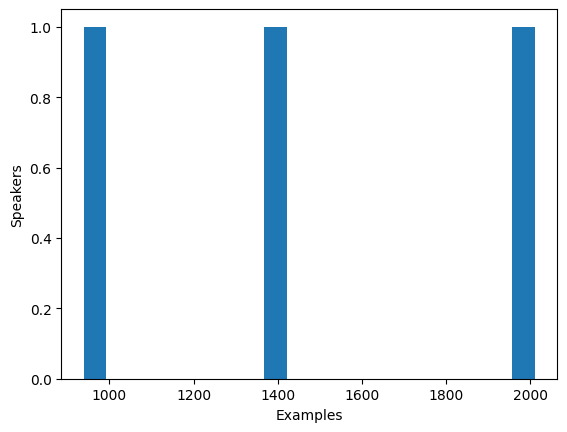

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(speaker_counts.values(), bins=20)
plt.ylabel("Speakers")
plt.xlabel("Examples")
plt.show()

In [ ]:
print(dataset)  # Check if any rows remain after filtering
print(len(dataset))  # Check the length of the dataset


Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
    num_rows: 4361
})
4361


In [ ]:
# def select_speaker(speaker_id):
#     return 900 <= speaker_counts[speaker_id] <= 2100

# dataset = dataset.filter(select_speaker, input_columns=["client_id"])

In [ ]:
# # Check how many speakers have between 900 and 2100 examples
# valid_speakers = {speaker_id: count for speaker_id, count in speaker_counts.items() if 900 <= count <= 2100}
# print(f"Valid speakers: {len(valid_speakers)}")


How many speakers remain?

In [ ]:
len(set(dataset["client_id"]))

3

And how many examples?

In [ ]:
len(dataset)

4361

## Speaker embeddings

In [ ]:
!pip install --upgrade speechbrain


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [ ]:
import os
import numpy
import torch
from speechbrain.pretrained import EncoderClassifier
import torch
import torchaudio
import glob
import numpy
import argparse
from tqdm import tqdm
import torch.nn.functional as F

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name),
)


def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

# spk_model = {
#     "speechbrain/spkrec-xvect-voxceleb": 512,
#     "speechbrain/spkrec-ecapa-voxceleb": 192,
# }

# def f2embed(wav_file, classifier, size_embed):
#     signal, fs = torchaudio.load(wav_file)
#     assert fs == 16000, fs
#     with torch.no_grad():
#         embeddings = classifier.encode_batch(signal)
#         embeddings = F.normalize(embeddings, dim=2)
#         embeddings = embeddings.squeeze().cpu().numpy()
#     assert embeddings.shape[0] == size_embed, embeddings.shape[0]
#     return embeddings

# def process(args):
#     wavlst = []
#     for split in args.splits.split(","):
#         wav_dir = os.path.join(args.arctic_root, split)
#         wavlst_split = glob.glob(os.path.join(wav_dir, "wav", "*.wav"))
#         print(f"{split} {len(wavlst_split)} utterances.")
#         wavlst.extend(wavlst_split)

#     spkemb_root = args.output_root
#     if not os.path.exists(spkemb_root):
#         print(f"Create speaker embedding directory: {spkemb_root}")
#         os.mkdir(spkemb_root)
#     device = "cuda" if torch.cuda.is_available() else "cpu"
#     classifier = EncoderClassifier.from_hparams(source=args.speaker_embed, run_opts={"device": device}, savedir=os.path.join('/tmp', args.speaker_embed))
#     size_embed = spk_model[args.speaker_embed]
#     for utt_i in tqdm(wavlst, total=len(wavlst), desc="Extract"):
#         # TODO rename speaker embedding
#         utt_id = "-".join(utt_i.split("/")[-3:]).replace(".wav", "")
#         utt_emb = f2embed(utt_i, classifier, size_embed)
#         numpy.save(os.path.join(spkemb_root, f"{utt_id}.npy"), utt_emb)


# def main():
#     parser = argparse.ArgumentParser()
#     parser.add_argument("--arctic-root", "-i", required=True, type=str, help="LibriTTS root directory.")
#     parser.add_argument("--output-root", "-o", required=True, type=str, help="Output directory.")
#     parser.add_argument("--speaker-embed", "-s", type=str, required=True, choices=["speechbrain/spkrec-xvect-voxceleb", "speechbrain/spkrec-ecapa-voxceleb"],
#                         help="Pretrained model for extracting speaker emebdding.")
#     parser.add_argument("--splits",  type=str, help="Split of four speakers seperate by comma.",
#                         default="cmu_us_bdl_arctic,cmu_us_clb_arctic,cmu_us_rms_arctic,cmu_us_slt_arctic")
#     args = parser.parse_args()
#     print(f"Loading utterances from {args.arctic_root}/{args.splits}, "
#         + f"Save speaker embedding 'npy' to {args.output_root}, "
#         + f"Using speaker model {args.speaker_embed} with {spk_model[args.speaker_embed]} size.")
#     process(args)


device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name)
)


def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

/tmp/ipykernel_31/40613773.py:4: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

## Preparing the dataset

In [ ]:
def prepare_dataset(example):
    # load the audio data; if necessary, this resamples the audio to 16kHz
    audio = example["audio"]

    # feature extraction and tokenization
    example = processor(
        text=example["sentence"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

Let's verify the processing is correct by looking at a single example:

In [ ]:
# processed_example = prepare_dataset(dataset[0])
# Check if the dataset is empty before accessing elements
if len(dataset) > 0:
    processed_example = prepare_dataset(dataset[0])
else:
    print("Dataset is empty. Please check the dataset loading or filtering steps.")

This should give us:

- the tokens for the input text in `input_ids`
- the speaker embedding in `speaker_embeddings`
- the target spectrogram in `labels`

In [ ]:
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

The tokens should decode into the original text, with `</s>` to mark the end of the sentence.

In [ ]:
tokenizer.decode(processed_example["input_ids"])

'hmne uskaa jn<unk> mdin mnaayaa.</s>'

Speaker embeddings should be a 512-element vector:

In [ ]:
processed_example["speaker_embeddings"].shape

(512,)

The labels should be a log-mel spectrogram with 80 mel bins.

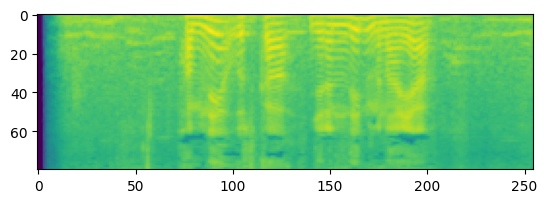

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

If we run a vocoder on the log-mel spectrogram, it should produce the original audio again. We'll load the HiFi-GAN vocoder from the original [SpeechT5 checkpoint](https://hf.co/microsoft/speecht5_hifigan).

In [ ]:
# from transformers import SpeechT5HifiGan
# vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

In [ ]:
# spectrogram = torch.tensor(processed_example["labels"])
# with torch.no_grad():
#     speech = vocoder(spectrogram)

In [ ]:
# from IPython.display import Audio
# Audio(speech.cpu().numpy(), rate=16000)

In [ ]:
dataset = dataset.map(
    prepare_dataset, remove_columns=dataset.column_names,
)

Map:   0%|          | 0/4361 [00:00<?, ? examples/s]

In [ ]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200

dataset = dataset.filter(is_not_too_long, input_columns=["input_ids"])

Filter:   0%|          | 0/4361 [00:00<?, ? examples/s]

In [ ]:
len(dataset)

4361

## Train/test split

In [ ]:
dataset = dataset.train_test_split(test_size=0.1)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 3924
    })
    test: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 437
    })
})

## Collator to make batches



In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:

        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids,
            labels=label_features,
            return_tensors="pt",
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor([
                len(feature["input_values"]) for feature in label_features
            ])
            target_lengths = target_lengths.new([
                length - length % model.config.reduction_factor for length in target_lengths
            ])
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [ ]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [ ]:
features = [
    dataset["train"][0],
    dataset["train"][1],
    dataset["train"][20],
]

batch = data_collator(features)

In [ ]:
{k:v.shape for k,v in batch.items()}

{'input_ids': torch.Size([3, 86]),
 'attention_mask': torch.Size([3, 86]),
 'labels': torch.Size([3, 466, 80]),
 'speaker_embeddings': torch.Size([3, 512])}

Looks good!

## Training

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

The `use_cache=True` option is incompatible with gradient checkpointing. Disable it for training, otherwise it keeps complaining about it.

In [ ]:
model.config.use_cache = False

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./speecht5_tts_voxpopuli_hindi",  # change to a repo name of your choice
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    eval_strategy="steps",
    per_device_eval_batch_size=8,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor.tokenizer,
)

/tmp/ipykernel_31/4196592502.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
max_steps is given, it will override any value given in num_train_epochs


In [ ]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]


Step,Training Loss,Validation Loss


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7e987f24be20>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
kwargs = {
    "dataset_tags": "mozilla-foundation/common_voice_11_0",
    "dataset": "common_voice_11_0",  # a 'pretty' name for the training dataset
    "dataset_args": "config: hi, split: train",
    "language": "hi",
    "model_name": "SpeechT5 TTS hindi",  # a 'pretty' name for your model
    "finetuned_from": "microsoft/speecht5_tts",
    "tasks": "text-to-speech",
    "tags": ["text-to-speech"],
}

The training results can now be uploaded to the Hub. To do so, execute the `push_to_hub` command:

In [ ]:
trainer.push_to_hub(**kwargs)

## Evaluate

In [ ]:
model = SpeechT5ForTextToSpeech.from_pretrained("Niha14/speecht5_tts_voxpopuli_hindi")

config.json:   0%|          | 0.00/2.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/578M [00:00<?, ?B/s]

First we need to obtain a speaker embedding. We can simply grab one from the test set.

In [ ]:
example = dataset["test"][304]
speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)
speaker_embeddings.shape

torch.Size([1, 512])

Define some input text and tokenize it.

In [ ]:
text = "aaj ka dinn bohot acha hai aur aaj bohot baarish ho rahi hai"

In [ ]:
tokenizer.decode(tokenizer(text)["input_ids"])

'aaj ka dinn bohot acha hai aur aaj bohot baarish ho rahi hai</s>'

In [ ]:
inputs = processor(text=text, return_tensors="pt")

Tell the model to generate a spectrogram from the input text.

In [ ]:
spectrogram = model.generate_speech(inputs["input_ids"], speaker_embeddings)

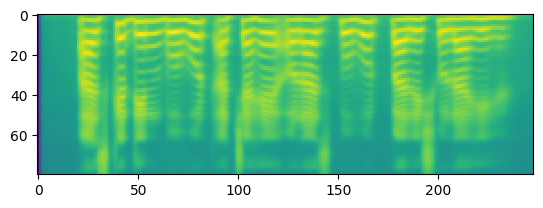

In [ ]:
plt.figure()
plt.imshow(spectrogram.T)
plt.show()

Finally, use the vocoder to turn the spectrogram into sound.

In [ ]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

In [ ]:
with torch.no_grad():
    speech = vocoder(spectrogram)

In [ ]:
from IPython.display import Audio
Audio(speech.numpy(), rate=16000)

In [ ]:
import soundfile as sf
sf.write("output.wav", speech.numpy(), samplerate=16000)